# About the Airlines Dataset
 We can use  this dataset in order to predict the flight ticket price based on the features provided in the columns of the dataset. 

In [1]:
import numpy as np # importing numpy as np for working with arrays
import pandas as pd # importing pandas as pd for data analysis

# importing seaborn as sns for making statistical graphic
# data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python
import seaborn as sns

# to load and display a local image in the IPython notebook
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array
from sklearn.preprocessing import LabelEncoder # used to normalize labels between 0 and 1.

In [2]:
df = pd.read_csv('airlines_dataset.csv') # pandas => read_csv function to read local csv file & assign it to dataframe
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# drop rows with ANY NaN with axis=0 (column)
df.dropna(axis=0,inplace=True)

In [4]:
# checking NaN value in all columns => and output in none of the column has 0 NaN values after dropna
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [5]:
# Spliting Target (X) Class From Attributes using iloc => all the row && column from 0 to last one column excluding 
X = df.iloc[:,:-1]
X.head() # display first 5 rows of the X dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [6]:
# Spliting Output (y) Class From Attributes using iloc => all the row && column from -1 to all which is the last one column (Price)  
y = df.iloc[:,-1:]
y

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


## Extract derived features from data

In [7]:
X.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [8]:
# extracting 'Month_of_Journey' from 'Date_of_Journey' and adding 'Month_of_Journey' new column in dataframe X
X["Month_of_Journey"] = pd.to_datetime(X['Date_of_Journey'],format="%d/%m/%Y").dt.month

# extracting 'Day_of_Journey' from 'Date_of_Journey' and adding 'Day_of_Journey' new column in dataframe X
X["Day_of_Journey"] = pd.to_datetime(X['Date_of_Journey'],format="%d/%m/%Y").dt.day

# after adding new column of Journey's month and day ,
# Dropping no longer needed "Date_of_Journey" column from the X & inplace=True reflect on real X dataframe 
X.drop("Date_of_Journey",axis=1,inplace=True)

In [9]:
X.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,3,1


In [10]:
# Same as the above "Date_of_Journey" column processing, need to do the same on "Arrival_Time" column

# extracting 'Arrival_Hour' from 'Arrival_Time' and adding 'Arrival_Hour' new column  in dataframe X
X["Arrival_Hour"] = pd.to_datetime(X['Arrival_Time']).dt.hour

# extracting 'Arrival_Minute' from 'Arrival_Time' and adding 'Arrival_Minute' new column in dataframe X
X["Arrival_Minute"] = pd.to_datetime(X['Arrival_Time']).dt.minute

# after adding new column of Arrival's Hour and Minute ,
# Dropping no longer needed "Arrival_Time" column from the X & inplace=True reflect on real X dataframe 
X.drop("Arrival_Time",axis=1,inplace=True)

In [11]:
X.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,3,1,21,35


In [12]:
# Same as the above "Arrival_Time" column processing, need to do the same on "Dep_Time" column

X["Dep_Hour"] = pd.to_datetime(X['Dep_Time']).dt.hour
X["Dep_Minute"] = pd.to_datetime(X['Dep_Time']).dt.minute

# after adding new column of Departure's Hour and Minute ,
# Dropping no longer needed "Dep_Time" column from the X & inplace=True reflect on real X dataframe
X.drop("Dep_Time",axis=1,inplace=True)

In [13]:
# give the 5 sample columns from the X dataframe
X.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9334,Jet Airways,Delhi,Cochin,DEL → BOM → COK,9h,1 stop,In-flight meal not included,6,27,19,0,10,0
1977,SpiceJet,Kolkata,Banglore,CCU → KNU → BLR,7h 15m,1 stop,No info,6,9,18,50,11,35
966,Air India,Delhi,Cochin,DEL → NAG → BOM → COK,37h 20m,2 stops,No info,5,21,19,15,5,55
901,Jet Airways,Delhi,Cochin,DEL → BOM → COK,15h 25m,1 stop,In-flight meal not included,5,9,4,25,13,0
6769,Vistara,Kolkata,Banglore,CCU → DEL → BLR,17h 45m,1 stop,No info,5,6,10,45,17,0


In [14]:
# Dropping the 'Duration' of the flight time column from the X dataframe
X.drop("Duration",axis=1,inplace=True)

In [15]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,3,1,21,35,16,50


In [16]:
#Similarly, Dropping the 'Route' & 'Additional_Info' column from the X dataframe
X.drop(["Route","Additional_Info"],axis=1, inplace=True)

## Handle categorical data 

In [17]:
# counting the total value unique in 'Airline' Column in X dataframe 
X["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
# Converting categorical variable of 'Airline' into dummy variables of each unique column  for the row value

Airline = X[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [19]:
# counting the total value unique in 'Source' Column in X dataframe 
X["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [20]:
# Converting categorical variable of 'Source' into dummy variables of each unique column for the row value

Source = X["Source"]
Source = pd.get_dummies( Source,drop_first =True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [21]:
# counting the total value unique in 'Destination' Column in X dataframe 
X["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [22]:
# Converting categorical variable of 'Destination' into dummy variables of each unique column for the row value

Destination =X[["Destination"]]
Destination =pd.get_dummies(Destination, drop_first=True)
Destination.head()



,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [23]:
# Altering / Changing / Replacing the string value to => 0, 1, 2, 3, 4
# 'inplace=True' reflect on real X dataframe

X.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace=True)

In [24]:
X.head()

,Airline,Source,Destination,Total_Stops,Month_of_Journey,Day_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,0,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,2,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,2,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,1,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,1,3,1,21,35,16,50


In [25]:
# Dropping the 'Airline', 'Source', 'Destination' column from the X dataframe

X.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [26]:
# Concatenate dataframe that consist of X, Airline, Source, and Destination into X only
# assigned after 'Extract derived features from data' && 'handling categorical data'

X = pd.concat([X, Airline, Source, Destination], axis=1)

In [27]:
X.head()

,Total_Stops,Month_of_Journey,Day_of_Journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,1,10,22,20,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,13,15,5,50,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,4,25,9,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,23,30,18,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,21,35,16,50,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Outlier Detection and Remove outlier from the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

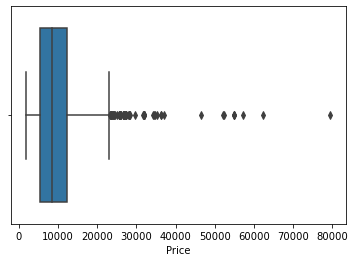

In [28]:
# concatination of 
# Input / Features / Feature Vector / Independent / Explanatory / Exogenous / Predictor variables
# &&
# Outputs / Labels (known outcomes) / Dependent / Explained / Predicted / Outcome / Target variable
df = pd.concat([X, y], axis=1) 

# box plot (or box-and-whisker plot) => comparisons between variables or across levels of a categorical variable
# comparisons between 'Price' variables across diffent levels
sns.boxplot(df["Price"])

In [29]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric 
# and object series and also the DataFrame column sets of mixed data types.

df["Price"].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [30]:
# flight price less than or eqal to 10,000

df = df[(df.Price <=10000)]
df.shape

(6312, 28)

You are required to create a jupyter notebook that contains your results of undertaking the research detailed below. For submission, you should generate PDF/ipynb document. Make sure your PDF/ipynb has rendered correctly before submitting.

You must use the attached dataset. This is a data pre-processing and data preparation task in which you must understand and preprocess your data thoroughly and accurately.

1. Short Introduction about Data set
2. Understanding data and data pre-preprocessing
3. Extract derived features from data
4. Perform data pre-processing
5. Handle categorical data and feature encoding
6. Perform label encoding on data
7. Outlier Detection and Remove outlier from the dataset
8. Select the best feature using the feature selection technique

Note: Don't forget to explain each and every section of the solution as far as possible.

From the selected topic below write 350 words explaining how it could help with the data preprocessing.

1. Data Wrangling
2. Data Cleaning
3. Data integration
4. Data Reduction
5. Data Transformation

Your work needs to be fully referenced, which is good practice for your dissertation.